In [12]:
# need sudo apt install libx11-dev libx11-6 libgl1-mesa-glx
from vtk import (vtkSphereSource, vtkPolyData, vtkDecimatePro)
import vtk

def decimation(inputPoly, targetReduction=0.05):

    print("Before decimation\n"
          "-----------------\n"
          "There are " + str(inputPoly.GetNumberOfPoints()) + "points.\n"
          "There are " + str(inputPoly.GetNumberOfPolys()) + "polygons.\n")

    decimate = vtkDecimatePro()
    decimate.SetInputData(inputPoly)
    decimate.SetTargetReduction(targetReduction)
    decimate.Update()

    decimatedPoly = vtkPolyData()
    decimatedPoly.ShallowCopy(decimate.GetOutput())

    print("After decimation \n"
          "-----------------\n"
          "There are " + str(decimatedPoly.GetNumberOfPoints()) + "points.\n"
          "There are " + str(decimatedPoly.GetNumberOfPolys()) + "polygons.\n")
    return decimatedPoly

In [13]:
# sphereS = vtkSphereSource()
# sphereS.Update()
# inputPoly = vtkPolyData()
# inputPoly.ShallowCopy(sphereS.GetOutput())

# decimation(inputPoly)

In [14]:
filename = '3d_files/cdot_test_1.stl'
out_filename = '3d_files/cdot_test_1_decimated.stl'
readerSTL = vtk.vtkSTLReader()
readerSTL.SetFileName(filename)
# 'update' the reader i.e. read the .stl file
readerSTL.Update()

inputPoly = readerSTL.GetOutput()
decimatedPoly = decimation(inputPoly, targetReduction=0.95)
writerSTL = vtk.vtkSTLWriter()
writerSTL.SetFileName(out_filename)
writerSTL.SetInputData(decimatedPoly)
writerSTL.Write()

Before decimation
-----------------
There are 53215points.
There are 105840polygons.

After decimation 
-----------------
There are 2767points.
There are 5291polygons.



1

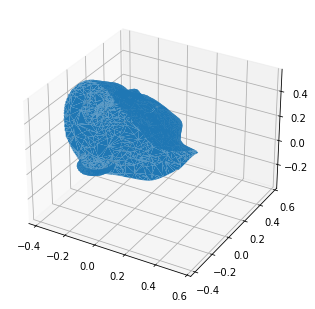

In [17]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('3d_files/cdot_test_1_decimated.stl')
your_mesh.vectors /= 100.0
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
# Show the plot to the screen
pyplot.show()

In [18]:
your_mesh.save('3d_files/cdot_test_1_deci_smaller.stl')

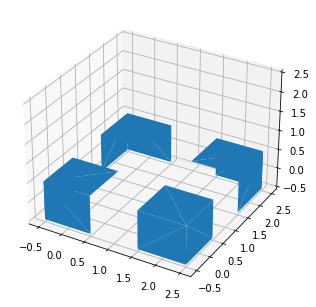

In [32]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

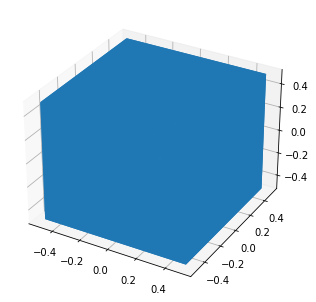

In [34]:
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

cube_back = mesh.Mesh(data.copy())
cube_front = mesh.Mesh(data.copy())

# Rotate 90 degrees over the X axis followed by the Y axis followed by the
# X axis
cube_back.rotate([0.5, 0.0, 0.0], math.radians(90))
cube_back.rotate([0.0, 0.5, 0.0], math.radians(90))
cube_back.rotate([0.5, 0.0, 0.0], math.radians(90))

cube = mesh.Mesh(numpy.concatenate([
    cube_back.data.copy(),
    cube_front.data.copy(),
]))

# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(cube.vectors))

# Auto scale to the mesh size
scale = cube_back.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

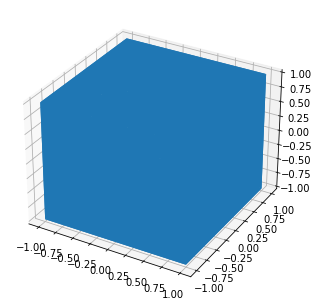

In [37]:
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(cube.vectors))

# Auto scale to the mesh size
scale = cube.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [182]:
import trimesh
import networkx as nx
import rtree
import numpy as np
import shapely
import open3d as o3d
# also requires `sudo apt install libusb-1.0.0-dev`

In [253]:
# obj_mesh = trimesh.load('3d_files/cdot_test_0.obj')
# obj_mesh = trimesh.load('3d_files/test_alex1.obj')
# obj_mesh = trimesh.load('3d_files/charlie_0.obj')
# obj_mesh = trimesh.load('3d_files/akash_test_0_original.obj')
obj_mesh = trimesh.load('images/user_image_0_original_washed_out.obj')

In [254]:
print(len(obj_mesh.faces))
sobj_mesh = obj_mesh
if len(sobj_mesh.faces) > 15000:
    sobj_mesh = obj_mesh.simplify_quadratic_decimation(len(obj_mesh.faces) // 10)
print(len(sobj_mesh.faces))
print(sobj_mesh.scale)
sobj_mesh.apply_scale(286/sobj_mesh.scale)
print(sobj_mesh.scale)
trimesh.repair.fix_inversion(sobj_mesh)
# sobj_mesh.vertex_normals = sobj_mesh.vertex_normals * -1

105840
10583
344.0603924771625
286.00000000000006


In [248]:
sobj_mesh.show()

In [240]:
sobj_mesh.show()

In [259]:
from scipy.spatial.transform import Rotation as R
r = R.from_euler('xyz', [[0, 12, 0]], degrees=True)
trans_mat = r.as_matrix()

full_trans_mat = np.eye(4)
full_trans_mat[:3, :3] = trans_mat
sobj_mesh.apply_transform(full_trans_mat)

<trimesh.Trimesh(vertices.shape=(5422, 3), faces.shape=(10583, 3))>

In [260]:
sobj_mesh.show()

In [261]:
nice_slice = sobj_mesh.section(
    plane_origin=sobj_mesh.centroid + np.array([0, 0, 38]),
    plane_normal=[0.55,0,1])
# nice_slice = sobj_mesh.section(
#     plane_origin=sobj_mesh.centroid + np.array([0, 0, 4]),
#     plane_normal=[0.55,0,1])
sobj_mesh.visual.face_colors = [255,170, 120, 255]

from scipy.spatial.transform import Rotation as R
r = R.from_euler('xyz', [[-30, 0, -90]], degrees=True)
trans_mat = r.as_matrix()

full_trans_mat = np.eye(4)
full_trans_mat[:3, :3] = trans_mat

# trans_mat[0,0] = trans_mat[1,1] = 0
# trans_mat[1,0] = -1
# trans_mat[0,1] = 1

vis_mesh = sobj_mesh.copy()
vis_slice = nice_slice.copy()

vis_mesh.apply_transform(full_trans_mat)
vis_slice.apply_transform(full_trans_mat)

<trimesh.Path3D(vertices.shape=(221, 3), len(entities)=1)>

In [262]:
scene = trimesh.Scene([vis_slice, vis_mesh])
scene.show(smooth=True)

In [263]:
sobj_mesh.centroid

array([  78.54305666,  290.26476531, -130.79006748])

In [175]:
# oroginal washed
sobj_mesh.centroid

array([140.41914043, 290.26476531, -59.64493691])

In [181]:
# original akash
sobj_mesh.centroid

array([150.40745269, 173.4749315 , -61.67835528])

In [105]:
# test_obj_mesh = trimesh.load('3d_files/cdot_test_dss_inverted.obj')
# test_obj_mesh.show()

In [166]:
assert(len(nice_slice.entities)) == 1

In [167]:
simp_slice, to_3D = nice_slice.to_planar()
simp_splice = simp_slice.simplify_spline()

node_list = simp_slice.entities[0].nodes
# ordered_vertices = np.array([
#     [simp_slice.vertices[a], simp_slice.vertices[b]] for (a, b) in node_list
# ])
ordered_vertices = np.array([simp_slice.vertices[p] for p in simp_slice.entities[0].points])

In [169]:
comp_mesh = trimesh.load_mesh('3d_files/cdot_compound_2.stl')

def create_trans_mat(x, y, z):
    r = R.from_euler('xyz', [[x, y, z]], degrees=True)
    trans_mat = r.as_matrix()

    full_trans_mat = np.eye(4)
    full_trans_mat[:3, :3] = trans_mat
    return full_trans_mat

full_trans_mat = create_trans_mat(-30, 0, -120)
# comp_mesh.apply_transform(full_trans_mat)
comp_mesh.apply_transform(to_3D)
# comp_mesh.vertices -= (comp_mesh.centroid - vis_mesh.centroid) - np.array([25, -20, 42])

# full_trans_mat = create_trans_mat(45, 0, 0)
# comp_mesh.apply_transform(full_trans_mat)

scene = trimesh.Scene([vis_slice, vis_mesh, comp_mesh])
scene.show()

In [11]:
# tri_mesh = trimesh.load_mesh('3d_files/cdot_test_1_deci_smaller.stl')
# tri_mesh.convex_hull.volume

In [12]:
# tri_mesh.convex_hull.show()

In [13]:
# tri_mesh.show()

In [14]:
# tri_mesh.section(plane_origin=tri_mesh.centroid + np.array([0, 0, 0.1]), plane_normal=[0,0,1])

In [15]:
# nice_slice = tri_mesh.section(plane_origin=tri_mesh.centroid + np.array([0, 0, 0.155]), plane_normal=[0.5,0,1])
# tri_mesh.visual.face_colors = [255,170, 120, 255]
# scene = trimesh.Scene([nice_slice, tri_mesh])
# scene.show()

(-12.883102870577146, 36.72827691293871, 0.0) (-15.780238238277718, 36.00687051415908, 0.0)
good point: 118
(-15.780238238277718, 36.00687051415908, 0.0) (-18.233283741901666, 35.155724546671166, 0.0)
good point: 119

In [39]:
str(dir(nice_slice))

"['__abstractmethods__', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_cache', '_entities', '_process_functions', '_vertices', 'apply_layer', 'apply_scale', 'apply_transform', 'apply_translation', 'bounds', 'centroid', 'colors', 'colors_crc', 'convert_units', 'copy', 'crc', 'dangling', 'discrete', 'discretize_path', 'entities', 'explode', 'export', 'extents', 'fill_gaps', 'is_closed', 'is_empty', 'kdtree', 'layers', 'length', 'md5', 'merge_vertices', 'metadata', 'paths', 'process', 'referenced_vertices', 'remove_duplicate_entities', 'remove_entities', 'remove_invalid', 'remove_unreferenced_vertices', 'replace_vertex_references', 'rezero', 'sca

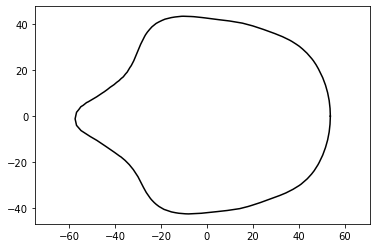

In [108]:
slice_2D, to_3D = nice_slice.to_planar()
slice_2D.show()

In [109]:
# tri_slice = tri_mesh.section(plane_origin=tri_mesh.centroid + np.array([0, 0, 0.103]), plane_normal=[0.28,0,1])
# tri_slice.show()

In [110]:
# tri_slice = tri_mesh.section(plane_origin=tri_mesh.centroid + np.array([0, 0, 0.117]), plane_normal=[0.24,0,1])
# tri_slice.show()

In [111]:
# tri_slice = tri_mesh.section(plane_origin=tri_mesh.centroid + np.array([0, 0, 0.14]), plane_normal=[0,0,1])
# # tri_slice.explode()
# # tri_slice.fill_gaps(distance=0.01)
# tri_slice.remove_duplicate_entities()
# tri_slice.show()

In [112]:
# tri_slice.vertices.min(axis=0), tri_slice.vertices.max(axis=0)

In [113]:
"""
Find pupils algo

0.05 radius in,
0.10 radius out

Find if there are pupils, and which rows they are

Track a list of pupil clusters
If in any cluster, skip

"""

'\nFind pupils algo\n\n0.05 radius in,\n0.10 radius out\n\nFind if there are pupils, and which rows they are\n\nTrack a list of pupil clusters\nIf in any cluster, skip\n\n'

In [114]:
# import networkx as nx
# G= tri_slice.vertex_graph
# layout = nx.drawing.layout.spring_layout(G)
# print(nx.draw(G, layout))
# colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]
# wcc = (G.subgraph(c).copy() for c in nx.connected_components(G))
# for index, sg in enumerate(wcc):  #there's probably a more elegant approach using zip
#     nx.draw_networkx(sg, pos = layout, edge_color = colorlist[index], node_color = colorlist[index])

In [115]:
# sample, vertices, voxelized
# vox_mesh = tri_mesh.voxelized(0.005)
# vox_mesh.show()

In [116]:
import sys

from OCC.Display.WebGl import threejs_renderer
from OCC.Core.BRepPrimAPI import BRepPrimAPI_MakeTorus
from OCC.Core.gp import gp_Vec
from OCC.Display.WebGl.jupyter_renderer import JupyterRenderer, NORMAL
from OCC.Core.BRepPrimAPI import BRepPrimAPI_MakeBox

sys.path.append('..')
from OCC.Extend.ShapeFactory import translate_shp

In [117]:
# # create 3 toruses
# # be careful to set copy to True or all the shapes will share the same mesh
# torus_shp1 = BRepPrimAPI_MakeTorus(20, 5).Shape()
# torus_shp2 = translate_shp(torus_shp1, gp_Vec(60, 0, 0), copy=True)
# torus_shp3 = translate_shp(torus_shp1, gp_Vec(-60, 0, 0), copy=True)

In [118]:
# # use the NORMAL.CLIENT_SIDE in order to clearly see faces
# # in case the NORMAL.SERVER_SIDE option is used, vertex normals lead to
# # a smooth rendering
# my_renderer = JupyterRenderer(compute_normals_mode=NORMAL.CLIENT_SIDE)
# my_renderer.DisplayShape(torus_shp1, shape_color="blue", topo_level="Face", quality=1.)  # default quality
# my_renderer.DisplayShape(torus_shp2, shape_color="red", quality=4)  # lower quality
# my_renderer.DisplayShape(torus_shp3, shape_color="green", quality=0.5)  # better quality

In [119]:
# my_renderer

In [120]:
print(*list(ordered_vertices[0]))

53.67274448100698 0.10497225392151995


In [121]:
len(ordered_vertices)

187

In [122]:
from OCC.Core.ChFi2d import ChFi2d_AnaFilletAlgo
from OCC.Core.gp import gp_Pnt, gp_Ax2, gp_Dir, gp_Circ, gp_Pln
from OCC.Core.GeomAPI import GeomAPI_PointsToBSpline
from OCC.Core.TColgp import TColgp_Array1OfPnt
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.BRepOffsetAPI import BRepOffsetAPI_MakePipe


def filletEdges(ed1, ed2):
    radius = 1.5
    f = ChFi2d_AnaFilletAlgo()
    f.Init(ed1,ed2,gp_Pln())
    f.Perform(radius)
    return f.Result(ed1, ed2)


def make_vertices(vertices, smooth_vertices=False):
    if smooth_vertices:
        filter_vec = np.array([0.2, 0.6, 0.2])
    else:
        filter_vec = np.array([0, 1, 0])
    pnts = []
    prev_coords = None
    # bad_vertices = {10}
    vertices = vertices.copy()
    vertices = np.append(vertices, vertices[:2], axis=0)
    for i in range(1, len(vertices) - 1):
#         if i in bad_vertices:
#             continue

        coords_list = vertices[i-1:i+2].T.dot(filter_vec)  # list((vertex_pair))
        # print(coords_list)
        coords_list = list(coords_list)
        # raise Exception
        if prev_coords is None or coords_list != prev_coords:
            # print(coords_list)
            pnts.append(gp_Pnt(coords_list[0], coords_list[1], 0))
            prev_coords = coords_list
    return pnts


def vertices_to_edges(pnts):
    edges = [BRepBuilderAPI_MakeEdge(pnts[i-1],pnts[i]).Edge() for i in range(1, len(pnts))]
    return edges


def edges_to_fillets(edges):
    fillets = []
    for i in range(1, len(edges)):
        try:
            fillets.append(filletEdges(edges[i-1], edges[i]))
        except Exception:
            print(i-1)
            print(edges[i-1])
            print(edges[i])
            raise Exception
    return fillets


def make_wire(edges, fillets):
    # the wire
    makeWire = BRepBuilderAPI_MakeWire()
    makeWire.Add(edges[0])
    for fillet, edge in zip(fillets, edges[1:]):        
        makeWire.Add(fillet)
        makeWire.Add(edge)
    makeWire.Build()
    wire = makeWire.Wire()
    return wire

    
def make_pipe(wire, p1):
    # the pipe
    direction = gp_Dir(1,0,0)
    circle = gp_Circ(gp_Ax2(p1,direction), 1.5)
    profile_edge = BRepBuilderAPI_MakeEdge(circle).Edge()
    profile_wire = BRepBuilderAPI_MakeWire(profile_edge).Wire()
    profile_face = BRepBuilderAPI_MakeFace(profile_wire).Face()
    pipe = BRepOffsetAPI_MakePipe(wire, profile_face).Shape()
    return pipe


def filter_vertices(pnts, close_loop):
    good_pnts = []
    if close_loop:
        pnts.extend(pnts[:2])
    else:
        good_pnts = pnts[:2]
    for i in range(2, len(pnts)):
        test_edges = vertices_to_edges([pnts[i-2], pnts[i-1], pnts[i]])
        test_fillets = edges_to_fillets(test_edges)
        test_wire = make_wire(test_edges, test_fillets)
        try:
            make_pipe(test_wire, pnts[i-2])
            # print("good point:", i)
            good_pnts.append(pnts[i])
        except Exception as e:
            print(i, e)
            raise(e)
    return good_pnts
                    
def compose_wire(pnts, close_loop=False, smooth_vertices=False):
    print("makevert")
    pnts = make_vertices(pnts, smooth_vertices)
    print("filtvert")
    pnts = filter_vertices(pnts, close_loop)
    # close the loop
    if close_loop:
        pnts.append(pnts[0])
    # the edges
    print("makeedge")
    edges = vertices_to_edges(pnts)  # [:len(pnts)//4])
    
    print("makefillets")
    fillets = edges_to_fillets(edges)
    
    print("makewire")
    wire = make_wire(edges, fillets)
    return wire, pnts


def render_pipe(pipe):
    my_renderer = JupyterRenderer(compute_normals_mode=NORMAL.CLIENT_SIDE)
    my_renderer.DisplayShape(pipe, shape_color="blue", topo_level="Face", quality=1.)  # default quality
    print(my_renderer)

In [123]:
wire, pnts = compose_wire(ordered_vertices, close_loop=True, smooth_vertices=True)
start_point = pnts[0]
pipe = make_pipe(wire, start_point)
render_pipe(pipe)

makevert
filtvert
makeedge
makefillets
makewire


In [124]:
recovered_vertices = np.array([pnt.XYZ().Coord() for pnt in pnts])

In [125]:
recovered_vertices.mean(axis=0), recovered_vertices.max(axis=0), recovered_vertices.min(axis=0)

(array([0.95034972, 0.39267812, 0.        ]),
 array([53.66147179, 43.58406248,  0.        ]),
 array([-57.37430478, -42.42679943,   0.        ]))

In [126]:
# def create_handles
"""
make new ring that is scaled up version of original
atan2(3/4), -atan2(3/4)
atan(3/-2) + pi, -(atan(3/-2) + pi)

find vertex with greatest normalized dot product with [3,4,0] in +y, use as cutoffs
with above and below zero

then add even vertices from cutoffs to max x and min x points in bigger
"""

ur_angle = np.array([4, 3, 0])
angle_prods = recovered_vertices.dot(ur_angle) / np.linalg.norm(recovered_vertices, axis=1)
ur_vertex = recovered_vertices[angle_prods.argmax()]

ul_angle = np.array([-2, 4, 0])
angle_prods = recovered_vertices.dot(ul_angle) / np.linalg.norm(recovered_vertices, axis=1)
ul_vertex = recovered_vertices[angle_prods.argmax()]
print(ur_vertex, ul_vertex)

[40.36914502 30.35028448  0.        ] [-20.87903048  41.13939955   0.        ]


In [127]:
exp_vertices = recovered_vertices * 1  #.2

upper_verts = exp_vertices[exp_vertices[:, 1] > 0]
upper_verts = upper_verts[upper_verts[:, 0] >= ul_vertex[0]]
upper_verts = upper_verts[upper_verts[:, 0] <= ur_vertex[0]]

In [128]:
upper_verts

array([[ 4.03691450e+01,  3.03502845e+01,  0.00000000e+00],
       [ 3.93188261e+01,  3.11088559e+01,  0.00000000e+00],
       [ 3.82625333e+01,  3.17863763e+01,  0.00000000e+00],
       [ 3.71353255e+01,  3.25102930e+01,  0.00000000e+00],
       [ 3.57319002e+01,  3.33018054e+01,  0.00000000e+00],
       [ 3.43692790e+01,  3.39837977e+01,  0.00000000e+00],
       [ 3.32507593e+01,  3.45102108e+01,  0.00000000e+00],
       [ 3.23700166e+01,  3.48903015e+01,  0.00000000e+00],
       [ 3.13974670e+01,  3.52665604e+01,  0.00000000e+00],
       [ 3.01714667e+01,  3.57865315e+01,  0.00000000e+00],
       [ 2.82619412e+01,  3.65012853e+01,  0.00000000e+00],
       [ 2.61744606e+01,  3.72901281e+01,  0.00000000e+00],
       [ 2.36564658e+01,  3.81519916e+01,  0.00000000e+00],
       [ 2.13944247e+01,  3.89130903e+01,  0.00000000e+00],
       [ 1.87086539e+01,  3.97507045e+01,  0.00000000e+00],
       [ 1.58660576e+01,  4.04964675e+01,  0.00000000e+00],
       [ 1.28665650e+01,  4.10273257e+01

In [ ]:
pnts = upper_verts
print("makevert")
pnts = make_vertices(pnts, smooth_vertices=False)
print("filtvert")
pnts = filter_vertices(pnts, close_loop=False)

In [ ]:
print("filtvert")
pnts = filter_vertices(pnts)
# close the loop
if close_loop:
    pnts.append(pnts[0])
# the edges
print("makeedge")
edges = vertices_to_edges(pnts)  # [:len(pnts)//4])

print("makefillets")
fillets = edges_to_fillets(edges)

print("makewire")
wire = make_wire(edges, fillets)

In [ ]:
u_wire, u_pnts = compose_wire(upper_verts, close_loop=False)

In [ ]:
start_point = u_pnts[0]
u_pipe = make_pipe(u_wire, start_point)
render_pipe(u_pipe)

In [46]:
# add the handles
from OCC.Core.TopoDS import TopoDS_Compound
from OCC.Core.BRep import BRep_Builder

In [52]:
aCompound = TopoDS_Compound()
aBuilder = BRep_Builder()
aBuilder.MakeCompound(aCompound);
aBuilder.Add(aCompound, pipe)
# aBuilder.Add(aCompound,shape1);
# aBuilder.Add(aCompund,shape2);
# aBuilder.Add(aCompound,shape3);
# aBuilder.Add(aCompound,shape4);
# ...
str(dir(aCompound))

"['Checked', 'Closed', 'Complement', 'Complemented', 'Compose', 'Composed', 'Convex', 'DumpJsonToString', 'EmptyCopied', 'EmptyCopy', 'Free', 'HashCode', 'Infinite', 'IsEqual', 'IsNotEqual', 'IsNull', 'IsPartner', 'IsSame', 'Located', 'Location', 'Locked', 'Modified', 'Move', 'Moved', 'NbChildren', 'Nullify', 'Orientable', 'Orientation', 'Oriented', 'Reverse', 'Reversed', 'ShapeType', 'TShape', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__eq_wrapper__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__ne_wrapper__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__weakref__', 'this', 'thisown']"

In [53]:
stl_writer.Write(aCompound, 'yolo.stl')

True

In [41]:
from OCC.Core.StlAPI import StlAPI_Writer
output_file = '3d_files/cdot_fitter_0_smoothed.stl'
stl_writer = StlAPI_Writer()
stl_writer.SetASCIIMode(True)
stl_writer.Write(pipe, output_file)
print("Written")

Written


In [81]:
from OCC.Core.ChFi2d import ChFi2d_AnaFilletAlgo
from OCC.Core.gp import gp_Pnt, gp_Ax2, gp_Dir, gp_Circ, gp_Pln
from OCC.Core.GeomAPI import GeomAPI_PointsToBSpline
from OCC.Core.TColgp import TColgp_Array1OfPnt
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.BRepOffsetAPI import BRepOffsetAPI_MakePipe
from OCC.Display.WebGl.jupyter_renderer import JupyterRenderer, NORMAL

def filletEdges(ed1, ed2):
    radius = 0.3
    f = ChFi2d_AnaFilletAlgo()
    f.Init(ed1,ed2,gp_Pln())
    f.Perform(radius)
    return f.Result(ed1, ed2)

def pipe():
    # the points
    p1 = gp_Pnt(-5.0,-5.0,0)
    p2 = gp_Pnt(0,1,0)
    p3 = gp_Pnt(1,2,0)
    p4 = gp_Pnt(2,2,0)
    # the edges
    ed1 = BRepBuilderAPI_MakeEdge(p1,p2).Edge()
    ed2 = BRepBuilderAPI_MakeEdge(p2,p3).Edge()
    ed3 = BRepBuilderAPI_MakeEdge(p3,p4).Edge()
    # inbetween
    fillet12 = filletEdges(ed1, ed2)
    fillet23 = filletEdges(ed2, ed3) 
    # the wire
    makeWire = BRepBuilderAPI_MakeWire()
    makeWire.Add(ed1)
    makeWire.Add(fillet12)
    makeWire.Add(ed2)
    makeWire.Add(fillet23)
    makeWire.Add(ed3)
    makeWire.Build()
    wire = makeWire.Wire()
    # the pipe
    dir = gp_Dir(0,1,0)
    circle = gp_Circ(gp_Ax2(p1,dir), 0.2*1)
    profile_edge = BRepBuilderAPI_MakeEdge(circle).Edge()
    profile_wire = BRepBuilderAPI_MakeWire(profile_edge).Wire()
    profile_face = BRepBuilderAPI_MakeFace(profile_wire).Face()
    pipe = BRepOffsetAPI_MakePipe(wire, profile_face).Shape()
    
    
    my_renderer = JupyterRenderer(compute_normals_mode=NORMAL.CLIENT_SIDE)
    my_renderer.DisplayShape(pipe, shape_color="blue", topo_level="Face", quality=1.)  # default quality
    print(my_renderer)
    
if __name__ == '__main__':
    pipe()
    # start_display()

In [6]:
render_pipe(aCompound)

In [15]:
from OCC.Core.StlAPI import StlAPI_Writer
# output_file = '3d_files/cdot_fitter_0_smoothed.stl'
# stl_writer = StlAPI_Writer()
# stl_writer.SetASCIIMode(True)
# stl_writer.Write(pipe, output_file)

output_file = '3d_files/cdot_compound.stl'
# cstl_writer = StlAPI_Writer()
# cstl_writer.SetASCIIMode(True)
# cstl_writer.Write(aCompound, output_file)
from OCC.Extend.DataExchange import write_stl_file
write_stl_file(aCompound, output_file)
print("Written")

Written
